In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import sys
sys.path.append('fit_lightcurves')
import model_transits

In [2]:
data_arr = np.load('/Users/eligendreaudistler/Desktop/wd-1856-534b/arrays/data_arr.npy', allow_pickle=True)

dates = ['2022-04-01', '2022-06-02', '2023-07-31', '2023-08-14', '2024-05-13', 
         '2024-06-06', '2024-06-13', '2024-06-23', '2024-06-30', '2024-07-07',
         '2024-07-14', '2024-07-24', '2024-08-07', '2024-08-14', '2025-05-17',
         '2025-05-24', '2025-06-07', '2025-06-17', '2025-07-01']
base_dir = '/Users/eligendreaudistler/Desktop/wd-1856-534b/arrays'

epoch_numbers = [634, 678, 979, 989, 1183, 1200, 1205, 1212, 1217, 1222, 1227, \
                 1234, 1244, 1249, 1445, 1450, 1460, 1467, 1477]

thetas = []

for i, date in enumerate(dates):
    theta_mcmc = np.load('arrays/theta_mcmc_{}.npy'.format(date))
    data_arr[i]['BJD_TDB'] -= theta_mcmc[0] # center midtransit on time 0
    thetas.append(theta_mcmc)

/Users/eligendreaudistler/Desktop/wd-1856-534b/fit_lightcurves/model_transits.py:852: RuntimeWarning: invalid value encountered in sqrt
  k = 0.5 * np.sqrt((1. - a) / (z * p))  # 8%


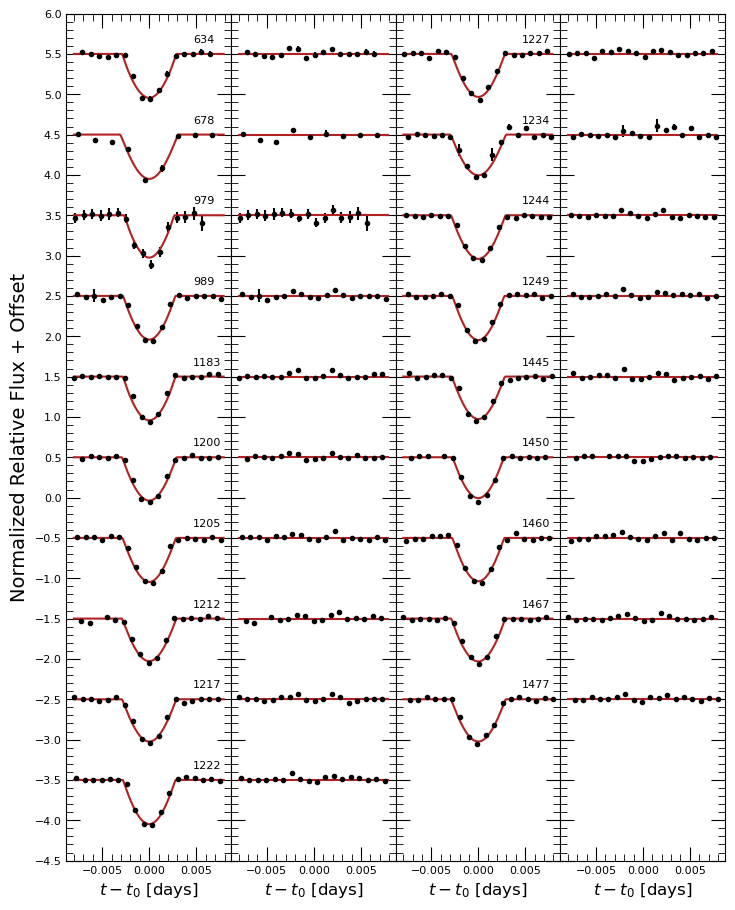

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(8.5, 11))
plt.subplots_adjust(wspace=0)
fontsize = 12

period = 1.4079405 # from NASA Exoplanet Archive
times = np.arange(-0.008, 0.008, 0.0001)

axs[1].tick_params(axis='y', labelleft=False)
axs[2].tick_params(axis='y', labelleft=False)
axs[3].tick_params(axis='y', labelleft=False)

for ax in axs:
    ax.set_ylim(-4.5, 6)
    ax.minorticks_on()
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.tick_params(axis='both', labelsize=8)
    ax.tick_params(direction='in', which='minor', length=5, bottom=True, top=True, left=True, right=True)
    ax.tick_params(direction='in', which='major', length=10, bottom=True, top=True, left=True, right=True)

    ax.set_xlabel('$t-t_0$ [days]', fontsize=fontsize)

axs[0].set_ylabel('Normalized Relative Flux + Offset', fontsize=fontsize+2)

for i, transit, epoch_num in zip(range(len(data_arr)), data_arr, epoch_numbers):
    col = 0 if i<10 else 1

    offset = (9-i)-4.5 if i<10 else (19-i)-4.5
    bjd_tdb = transit['BJD_TDB']
    mask = np.abs(bjd_tdb) < 0.008
    bjd_tdb = bjd_tdb[mask]
    rel_flux = transit['rel_flux_T1_normalized'][mask]
    rel_flux_err = transit['rel_flux_err_T1_normalized'][mask]
    axs[0+2*col].errorbar(bjd_tdb, rel_flux+np.ones_like(rel_flux)*offset, yerr=rel_flux_err, marker='.', linestyle='', color='black')

    t0, b, r_a, Rp_Rs, log_f, u1, u2 = thetas[i]
    model = model_transits.modeltransit([0, b, r_a, Rp_Rs, 1, u1, u2], model_transits.occultquad, period, bjd_tdb)
    res = rel_flux - model

    model = model_transits.modeltransit([0, b, r_a, Rp_Rs, 1, u1, u2], model_transits.occultquad, period, times)
    axs[0+2*col].plot(times, model+np.ones_like(model)*offset, color='firebrick')

    axs[1+2*col].errorbar(bjd_tdb, res+np.ones_like(res)*offset+1, yerr=rel_flux_err, marker='.', linestyle='', color='black')
    axs[1+2*col].plot(times, np.ones_like(times)*offset+1, color='firebrick')

    axs[0+2*col].text(0.00465, offset+1.14, epoch_num, fontsize=8)

save_path = '/Users/eligendreaudistler/Desktop/wd-1856-534b/imgs/lightcurves.pdf'
plt.savefig(save_path, format='pdf', bbox_inches='tight');